# CNN, First model

### Imports and fetch data

In [13]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv1D, GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import TensorBoard, EarlyStopping
import pickle
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# import data
with open('X_train_even.pickle', 'rb') as handle:
    X_train = pickle.load(handle)
    
with open('Y_train_even.pickle', 'rb') as handle:
    Y_train = pickle.load(handle)
    
with open('scores_train_even.pickle', 'rb') as handle:
    scores_train = pickle.load(handle)
    
with open('X_test_even.pickle', 'rb') as handle:
    X_test = pickle.load(handle)
    
with open('Y_test_even.pickle', 'rb') as handle:
    Y_test = pickle.load(handle)
    
with open('scores_test_even.pickle', 'rb') as handle:
    scores_test = pickle.load(handle)
    
# import dictionaries
with open('ix_to_word.pickle', 'rb') as handle:
    ix_to_word = pickle.load(handle)
    
# small change in format
tmp = np.concatenate(X_train).ravel()
X_train = np.reshape(tmp,(len(X_train),100))

tmp = np.concatenate(X_test).ravel()
X_test = np.reshape(tmp,(len(X_test),100))

review_length = X_test.shape[1]
num_words = 46210

print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))
print('The length of each review is {}.'.format(review_length))


Loaded dataset with 199483 training samples, 49871 test samples
The length of each review is 100.


In [4]:
num_datapoints = 10000

small_Y = Y_train[0:num_datapoints]
small_X = X_train[0:num_datapoints]

### Define models to try

In [4]:
def one_conv_model(review_length, num_words):
    model = Sequential()
    emb = Embedding(num_words, 200, input_length=review_length)
    model.add(emb)
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [5]:
def two_conv_model(review_length, num_words):
    model = Sequential()
    emb = Embedding(num_words, 200, input_length=review_length)
    model.add(emb)
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [22]:
def two_conv_regularized_model(review_length, num_words):
    model = Sequential()
    emb = Embedding(num_words, 200, input_length=review_length)
    model.add(emb)
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [48]:
def two_conv_regularized_larger_kernel_model(review_length, num_words):
    model = Sequential()
    emb = Embedding(num_words, 200, input_length=review_length)
    model.add(emb)
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=100, kernel_size=4, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [37]:
def three_conv_regularized_model(review_length, num_words):
    model = Sequential()
    emb = Embedding(num_words, 200, input_length=review_length)
    model.add(emb)
    model.add(Conv1D(filters=50, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=30, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=20, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [40]:
def three_conv_more_filter_model(review_length, num_words):
    model = Sequential()
    emb = Embedding(num_words, 200, input_length=review_length)
    model.add(emb)
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [42]:
def three_conv_larger_kernel_model(review_length, num_words):
    model = Sequential()
    emb = Embedding(num_words, 200, input_length=review_length)
    model.add(emb)
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=100, kernel_size=3, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=100, kernel_size=5, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [6]:
def vanilla_nn(review_length, num_words):
    model = Sequential()
    emb = Embedding(num_words, 200, input_length=review_length)
    model.add(emb)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

### Train models

In [7]:
model = one_conv_model(review_length, num_words)
tb = TensorBoard(log_dir='./logs/one_conv_model')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])
#model.fit(small_X, small_Y, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])

Train on 159586 samples, validate on 39897 samples
Epoch 1/10
159586/159586 [==============================] - 106s 666us/step - loss: 0.3165 - acc: 0.8630 - val_loss: 0.2748 - val_acc: 0.8875
Epoch 2/10
159586/159586 [==============================] - 74s 463us/step - loss: 0.2035 - acc: 0.9205 - val_loss: 0.2802 - val_acc: 0.8881
Epoch 3/10
159586/159586 [==============================] - 84s 526us/step - loss: 0.1284 - acc: 0.9527 - val_loss: 0.2946 - val_acc: 0.8931
Epoch 4/10
159586/159586 [==============================] - 88s 551us/step - loss: 0.0764 - acc: 0.9729 - val_loss: 0.3145 - val_acc: 0.8950
Epoch 5/10
159586/159586 [==============================] - 88s 552us/step - loss: 0.0468 - acc: 0.9834 - val_loss: 0.3951 - val_acc: 0.8923
Epoch 6/10
159586/159586 [==============================] - 88s 551us/step - loss: 0.0328 - acc: 0.9887 - val_loss: 0.4649 - val_acc: 0.8927
Epoch 7/10
159586/159586 [==============================] - 88s 552us/step - loss: 0.0245 - acc: 0.991

In [14]:
model = two_conv_model(review_length, num_words)
tb = TensorBoard(log_dir='./logs/two_conv_model')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])
#model.fit(small_X, small_Y, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])

Train on 159586 samples, validate on 39897 samples
Epoch 1/10
159586/159586 [==============================] - 24s 151us/step - loss: 0.3341 - acc: 0.8514 - val_loss: 0.2605 - val_acc: 0.8946
Epoch 2/10
159586/159586 [==============================] - 22s 136us/step - loss: 0.1930 - acc: 0.9267 - val_loss: 0.2478 - val_acc: 0.9039
Epoch 3/10
159586/159586 [==============================] - 22s 135us/step - loss: 0.1121 - acc: 0.9609 - val_loss: 0.2757 - val_acc: 0.9027
Epoch 4/10
159586/159586 [==============================] - 22s 139us/step - loss: 0.0630 - acc: 0.9792 - val_loss: 0.3466 - val_acc: 0.8986
Epoch 5/10
159586/159586 [==============================] - 22s 139us/step - loss: 0.0366 - acc: 0.9884 - val_loss: 0.4054 - val_acc: 0.8964
Epoch 6/10
159586/159586 [==============================] - 22s 140us/step - loss: 0.0275 - acc: 0.9908 - val_loss: 0.4519 - val_acc: 0.8974
Epoch 7/10
159586/159586 [==============================] - 22s 139us/step - loss: 0.0205 - acc: 0.9933

In [24]:
model = two_conv_regularized_model(review_length, num_words)
tb = TensorBoard(log_dir='./logs/two_conv_regularized_model')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])
#model.fit(small_X, small_Y, validation_split=0.2, epochs=10, batch_size=256, verbose=1)

Train on 159586 samples, validate on 39897 samples
Epoch 1/10
159586/159586 [==============================] - 29s 180us/step - loss: 0.3363 - acc: 0.8537 - val_loss: 0.2650 - val_acc: 0.8919
Epoch 2/10
159586/159586 [==============================] - 28s 174us/step - loss: 0.1921 - acc: 0.9260 - val_loss: 0.2633 - val_acc: 0.8976
Epoch 3/10
159586/159586 [==============================] - 28s 175us/step - loss: 0.1181 - acc: 0.9569 - val_loss: 0.3003 - val_acc: 0.8948
Epoch 4/10
159586/159586 [==============================] - 28s 175us/step - loss: 0.0736 - acc: 0.9736 - val_loss: 0.3469 - val_acc: 0.8967
Epoch 5/10
159586/159586 [==============================] - 28s 175us/step - loss: 0.0522 - acc: 0.9817 - val_loss: 0.3881 - val_acc: 0.8945
Epoch 6/10
159586/159586 [==============================] - 28s 175us/step - loss: 0.0396 - acc: 0.9860 - val_loss: 0.4463 - val_acc: 0.8922
Epoch 7/10
159586/159586 [==============================] - 28s 175us/step - loss: 0.0348 - acc: 0.9877

In [49]:
model = two_conv_regularized_larger_kernel_model(review_length, num_words)
tb = TensorBoard(log_dir='./logs/two_conv_regularized_larger_kernel_model')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])
#model.fit(small_X, small_Y, validation_split=0.2, epochs=10, batch_size=256, verbose=1)

Train on 159586 samples, validate on 39897 samples
Epoch 1/10
159586/159586 [==============================] - 33s 204us/step - loss: 0.3303 - acc: 0.8561 - val_loss: 0.2616 - val_acc: 0.8950
Epoch 2/10
159586/159586 [==============================] - 31s 191us/step - loss: 0.1790 - acc: 0.9316 - val_loss: 0.2726 - val_acc: 0.8948
Epoch 3/10
159586/159586 [==============================] - 31s 192us/step - loss: 0.1000 - acc: 0.9639 - val_loss: 0.3138 - val_acc: 0.8922
Epoch 4/10
159586/159586 [==============================] - 31s 192us/step - loss: 0.0635 - acc: 0.9773 - val_loss: 0.3699 - val_acc: 0.8914
Epoch 5/10
159586/159586 [==============================] - 31s 191us/step - loss: 0.0454 - acc: 0.9841 - val_loss: 0.4105 - val_acc: 0.8937
Epoch 6/10
159586/159586 [==============================] - 31s 191us/step - loss: 0.0378 - acc: 0.9871 - val_loss: 0.4348 - val_acc: 0.8972
Epoch 7/10
159586/159586 [==============================] - 31s 192us/step - loss: 0.0342 - acc: 0.9880

In [38]:
model = three_conv_regularized_model(review_length, num_words)
model.summary()
tb = TensorBoard(log_dir='./logs/three_conv_regularized_model')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])
#model.fit(small_X, small_Y, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 100, 200)          9242000   
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 99, 50)            20050     
_________________________________________________________________
batch_normalization_14 (Batc (None, 99, 50)            200       
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 98, 30)            3030      
_________________________________________________________________
batch_normalization_15 (Batc (None, 98, 30)            120       
_________________________________________________________________
conv1d_34 (Conv1D)           (None, 97, 20)            1220      
_________________________________________________________________
batch_normalization_16 (Batc (None, 97, 20)            80        
__________

In [41]:
model = three_conv_more_filter_model(review_length, num_words)
tb = TensorBoard(log_dir='./logs/three_conv_more_filter_model')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])
#model.fit(small_X, small_Y, validation_split=0.2, epochs=10, batch_size=256, verbose=1)

Train on 159586 samples, validate on 39897 samples
Epoch 1/10
159586/159586 [==============================] - 38s 235us/step - loss: 0.3368 - acc: 0.8539 - val_loss: 0.2657 - val_acc: 0.8916
Epoch 2/10
159586/159586 [==============================] - 36s 223us/step - loss: 0.2055 - acc: 0.9198 - val_loss: 0.2573 - val_acc: 0.8971
Epoch 3/10
159586/159586 [==============================] - 36s 223us/step - loss: 0.1362 - acc: 0.9488 - val_loss: 0.2780 - val_acc: 0.8960
Epoch 4/10
159586/159586 [==============================] - 36s 223us/step - loss: 0.0909 - acc: 0.9670 - val_loss: 0.3208 - val_acc: 0.8955
Epoch 5/10
159586/159586 [==============================] - 35s 222us/step - loss: 0.0657 - acc: 0.9763 - val_loss: 0.3660 - val_acc: 0.8909
Epoch 6/10
159586/159586 [==============================] - 35s 222us/step - loss: 0.0499 - acc: 0.9819 - val_loss: 0.3839 - val_acc: 0.8932
Epoch 7/10
159586/159586 [==============================] - 35s 219us/step - loss: 0.0402 - acc: 0.9859

In [43]:
model = three_conv_larger_kernel_model(review_length, num_words)
tb = TensorBoard(log_dir='./logs/three_conv_larger_kernel_model')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])
#model.fit(small_X, small_Y, validation_split=0.2, epochs=10, batch_size=256, verbose=1)

Train on 159586 samples, validate on 39897 samples
Epoch 1/10
159586/159586 [==============================] - 42s 262us/step - loss: 0.3382 - acc: 0.8510 - val_loss: 0.2690 - val_acc: 0.8897
Epoch 2/10
159586/159586 [==============================] - 39s 245us/step - loss: 0.1967 - acc: 0.9242 - val_loss: 0.2655 - val_acc: 0.8974
Epoch 3/10
159586/159586 [==============================] - 39s 246us/step - loss: 0.1268 - acc: 0.9531 - val_loss: 0.2818 - val_acc: 0.8979
Epoch 4/10
159586/159586 [==============================] - 39s 246us/step - loss: 0.0799 - acc: 0.9711 - val_loss: 0.3355 - val_acc: 0.8981
Epoch 5/10
159586/159586 [==============================] - 39s 246us/step - loss: 0.0574 - acc: 0.9797 - val_loss: 0.3840 - val_acc: 0.8895
Epoch 6/10
159586/159586 [==============================] - 39s 247us/step - loss: 0.0431 - acc: 0.9850 - val_loss: 0.4017 - val_acc: 0.8963
Epoch 7/10
159586/159586 [==============================] - 39s 247us/step - loss: 0.0344 - acc: 0.9880

In [17]:
model = vanilla_nn(review_length, num_words)
tb = TensorBoard(log_dir='./logs/vanilla_nn_model')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])
#model.fit(small_X, small_Y, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])

Train on 159586 samples, validate on 39897 samples
Epoch 1/10
159586/159586 [==============================] - 19s 121us/step - loss: 0.3484 - acc: 0.8455 - val_loss: 0.2845 - val_acc: 0.8831
Epoch 2/10
159586/159586 [==============================] - 19s 118us/step - loss: 0.1256 - acc: 0.9545 - val_loss: 0.3635 - val_acc: 0.8730
Epoch 3/10
159586/159586 [==============================] - 19s 118us/step - loss: 0.0318 - acc: 0.9901 - val_loss: 0.5389 - val_acc: 0.8736
Epoch 4/10
159586/159586 [==============================] - 19s 118us/step - loss: 0.0098 - acc: 0.9972 - val_loss: 0.6924 - val_acc: 0.8731
Epoch 5/10
159586/159586 [==============================] - 19s 119us/step - loss: 0.0090 - acc: 0.9972 - val_loss: 0.7991 - val_acc: 0.8672
Epoch 6/10
159586/159586 [==============================] - 19s 119us/step - loss: 0.0222 - acc: 0.9924 - val_loss: 0.6884 - val_acc: 0.8674
Epoch 7/10
159586/159586 [==============================] - 19s 118us/step - loss: 0.0091 - acc: 0.9969

### Predict

In [ ]:
model.save('two_conv_regularized_larger_kernel_model.h5')

In [5]:
model = load_model('two_conv_regularized_larger_kernel_model.h5')

In [6]:
print(model.summary())
preds = np.round(model.predict(X_test)).T
preds = preds[0]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 100, 200)          9242000   
_________________________________________________________________
conv1d_43 (Conv1D)           (None, 99, 100)           40100     
_________________________________________________________________
batch_normalization_25 (Batc (None, 99, 100)           400       
_________________________________________________________________
conv1d_44 (Conv1D)           (None, 96, 100)           40100     
_________________________________________________________________
batch_normalization_26 (Batc (None, 96, 100)           400       
_________________________________________________________________
global_max_pooling1d_19 (Glo (None, 100)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               25856     
__________

### Investigate misclassifications

In [57]:
misclassifications = np.where(preds!=Y_test)
misclassifications = misclassifications[0]
print('Out of {} test reviews, {} were misclassified.'.format(len(Y_test), len(misclassifications)))
print('A few examples of the misclassified reviews:')

def print_sentence(index):
    sentence_ix = misclassifications[index]
    tmp = []
    for val in X_test[sentence_ix]:
        if ix_to_word[str(val)] == 'ZERO':
            break
        tmp.append(ix_to_word[str(val)])
    processed_sentence = ' '.join(tmp)
    print(processed_sentence)
    
def print_misclassification(index):
    print('1. Predicted output: {} Actual label: {} Score: {}'.format(preds[misclassifications[index]], Y_test[misclassifications[index]], scores_test[misclassifications[index]]))
    print_sentence(index)
    print(' ')
  
print_misclassification(0)
print_misclassification(10)
print_misclassification(20)
print_misclassification(30)
print_misclassification(40)
print_misclassification(50)
print_misclassification(60)
#print('1. Predicted output: {} Actual label: {} Score: {}'.format(preds[misclassifications[0]], Y_test[misclassifications[0]], scores_test[misclassifications[0]]))
#print_sentence(0)
#print('2. Predicted output: {} Actual label: {} Score: {}'.format(preds[misclassifications[1]], Y_test[misclassifications[1]], scores_test[misclassifications[1]]))
#print_sentence(1)
#print('3. Predicted output: {} Actual label: {} Score: {}'.format(preds[misclassifications[2]], Y_test[misclassifications[2]], scores_test[misclassifications[2]]))
#print_sentence(2)

Out of 49871 test reviews, 4902 were misclassified.
A few examples of the misclassified reviews:
1. Predicted output: 0.0 Actual label: 1 Score: 4
this is good flavorful coffee but just not quite the right blend for me there are others i like more so will not be ordering it again good price from amazon though
 
1. Predicted output: 0.0 Actual label: 1 Score: 5
both my puppy puggle and 2 year old shitzu these treats it did in fact assist me in training the puggle but now that she is getting older and doing well i am starting to use this as a treat delivery was also fast so i was happy about that because it came at a perfect time
 
1. Predicted output: 1.0 Actual label: 0 Score: 3
it gives your water a mild flavor the small packaging is very good handy to carry with you or keep in your desk this was fun to try but i prefer my water straight
 
1. Predicted output: 1.0 Actual label: 0 Score: 3
the instructions on how to prepare this box of macaroni and cheese are basically the same as the 

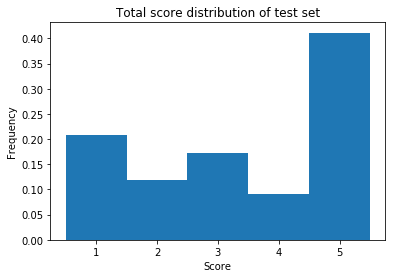

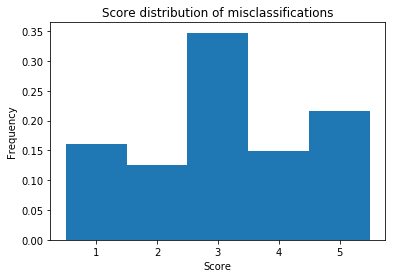

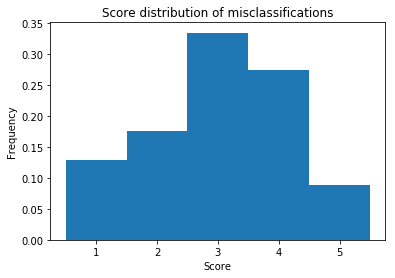

In [47]:
###### SCORE DISTRIBUTION ######
plt.hist(scores_test, bins=[1,2,3,4,5,6], normed=True)
plt.title('Total score distribution of test set')
plt.ylabel('Frequency')
plt.xlabel('Score')
plt.xticks([1.5,2.5,3.5,4.5,5.5],[1,2,3,4,5])
plt.show()
#print('Total number of data points: %d' %len(Y_even))

plt.hist(scores_test[misclassifications], bins=[1,2,3,4,5,6], normed=True)
plt.title('Score distribution of misclassifications')
plt.ylabel('Frequency')
plt.xlabel('Score')
#plt.Axes.set_xticks(ticks=[1.5,2.5,3.5,4.5,5.5])
plt.xticks([1.5,2.5,3.5,4.5,5.5],[1,2,3,4,5])
plt.show()
#print('Number of training data points: %d' %len(Y_train_even))

num_scores = [sum(scores_test == 1), sum(scores_test == 2), sum(scores_test == 3), sum(scores_test == 4), sum(scores_test == 5)]
num_scores_misclassifications = [sum(scores_test[misclassifications] == 1), sum(scores_test[misclassifications] == 2), sum(scores_test[misclassifications] == 3), sum(scores_test[misclassifications] == 4), sum(scores_test[misclassifications] == 5)]

scaled_scores_mis = [num_scores_misclassifications[i]/num_scores[i] for i in range(5)]
scaled_scores_mis = np.round([x*1000 for x in scaled_scores_mis])
scaled_scores_mis_data = [1] * int(scaled_scores_mis[0]) + [2] * int(scaled_scores_mis[1]) + [3] * int(scaled_scores_mis[2]) + [4] * int(scaled_scores_mis[3]) + [5] * int(scaled_scores_mis[4])

plt.hist(scaled_scores_mis_data, bins=[1,2,3,4,5,6], normed=True)
plt.title('Score distribution of misclassifications')
plt.ylabel('Frequency')
plt.xlabel('Score')
#plt.Axes.set_xticks(ticks=[1.5,2.5,3.5,4.5,5.5])
plt.xticks([1.5,2.5,3.5,4.5,5.5],[1,2,3,4,5])
plt.show()
#print('Number of training data points: %d' %len(Y_train_even))